In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from collections import Counter
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os

import warnings
warnings.filterwarnings('ignore')


In [0]:
train = pd.read_csv("train_data.csv")

In [0]:
test = pd.read_csv("test_data.csv")

In [0]:
price=pd.read_csv('published_land_price.csv')

In [5]:
train.head(2)

,id,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,土地の形状,間口,延床面積（㎡）,建築年,建物の構造,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,y
0,1,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,1,２ＬＤＫ,55,NaN,NaN,NaN,昭和59年,ＳＲＣ,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,600.0,2017年第４四半期,改装済,NaN,66.0
1,2,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,5,１Ｋ,20,NaN,NaN,NaN,平成15年,ＲＣ,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,500.0,2017年第４四半期,未改装,NaN,19.0


In [6]:
print("歪度: %f" % train['y'].skew())
print("尖度: %f" % train['y'].kurt())

歪度: 63.882934
尖度: 7603.439125


In [7]:
train.columns

Index(['id', '種類', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
       '最寄駅：距離（分）', '間取り', '面積（㎡）', '土地の形状', '間口', '延床面積（㎡）', '建築年', '建物の構造',
       '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類', '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）',
       '容積率（％）', '取引時点', '改装', '取引の事情等', 'y'],
      dtype='object')

In [8]:
train = train.rename(columns={
    "種類": "Type",
    "地域": "Region",
    "市区町村コード": "MunicipalityCode",
    "都道府県名": "Prefecture",
    "市区町村名": "Municipality",
    "地区名": "DistrictName",
    "最寄駅：名称": "NearestStation",
    "最寄駅：距離（分）": "TimeToNearestStation",
    "取引価格（総額）": "TradePrice",
    "坪単価": "PricePerUnit",
    "間取り": "FloorPlan",
    "面積（㎡）": "Area",
    "取引価格（平方メートル単価）": "UnitPrice",
    "土地の形状": "LandShape",
    "間口": "Frontage",
    "延床面積（㎡）": "TotalFloorArea",
    "建築年": "BuildingYear",
    "建物の構造": "Structure",
    "用途": "Use",
    "今後の利用目的": "Purpose",
    "前面道路：方位": "Direction",
    "前面道路：種類": "Classification",
    "前面道路：幅員（ｍ）": "Breadth",
    "都市計画": "CityPlanning",
    "建ぺい率（％）": "CoverageRatio",
    "容積率（％）": "FloorAreaRatio",
    "取引時点": "Period",
    "改装": "Renovation",
    "取引の事情等": "Remarks",
    "y"  :"SalePrice"
}
)
train.head(2)

,id,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,FloorPlan,Area,LandShape,Frontage,TotalFloorArea,BuildingYear,Structure,Use,Purpose,Direction,Classification,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Renovation,Remarks,SalePrice
0,1,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,1,２ＬＤＫ,55,NaN,NaN,NaN,昭和59年,ＳＲＣ,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,600.0,2017年第４四半期,改装済,NaN,66.0
1,2,中古マンション等,NaN,13101,東京都,千代田区,飯田橋,飯田橋,5,１Ｋ,20,NaN,NaN,NaN,平成15年,ＲＣ,NaN,住宅,NaN,NaN,NaN,商業地域,80.0,500.0,2017年第４四半期,未改装,NaN,19.0


In [0]:
test = test.rename(columns={
    "種類": "Type",
    "地域": "Region",
    "市区町村コード": "MunicipalityCode",
    "都道府県名": "Prefecture",
    "市区町村名": "Municipality",
    "地区名": "DistrictName",
    "最寄駅：名称": "NearestStation",
    "最寄駅：距離（分）": "TimeToNearestStation",
    "取引価格（総額）": "TradePrice",
    "坪単価": "PricePerUnit",
    "間取り": "FloorPlan",
    "面積（㎡）": "Area",
    "取引価格（平方メートル単価）": "UnitPrice",
    "土地の形状": "LandShape",
    "間口": "Frontage",
    "延床面積（㎡）": "TotalFloorArea",
    "建築年": "BuildingYear",
    "建物の構造": "Structure",
    "用途": "Use",
    "今後の利用目的": "Purpose",
    "前面道路：方位": "Direction",
    "前面道路：種類": "Classification",
    "前面道路：幅員（ｍ）": "Breadth",
    "都市計画": "CityPlanning",
    "建ぺい率（％）": "CoverageRatio",
    "容積率（％）": "FloorAreaRatio",
    "取引時点": "Period",
    "改装": "Renovation",
    "取引の事情等": "Remarks"
}
)

In [10]:
train["SalePrice"].describe()

count    356344.000000
mean         65.434766
std         315.011339
min           0.000500
25%          21.000000
50%          35.000000
75%          53.000000
max       61000.000000
Name: SalePrice, dtype: float64

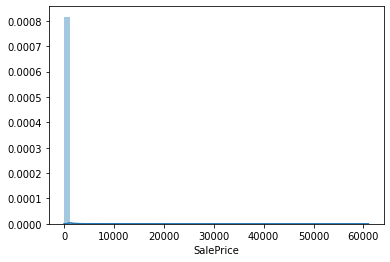

In [11]:
ax = sns.distplot(train['SalePrice'])
plt.show()

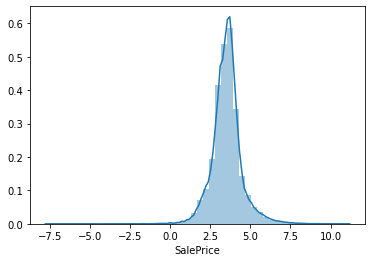

In [0]:
train['SalePrice'] = np.log(train['SalePrice'])

ax = sns.distplot(train['SalePrice'])
plt.show()

In [0]:
len(train["Area"])+len(test["Area"])

391188

In [0]:
train.dtypes

id                        int64
Type                     object
Region                   object
MunicipalityCode          int64
Prefecture               object
Municipality             object
DistrictName             object
NearestStation           object
TimeToNearestStation     object
FloorPlan                object
Area                     object
LandShape                object
Frontage                 object
TotalFloorArea           object
BuildingYear             object
Structure                object
Use                      object
Purpose                  object
Direction                object
Classification           object
Breadth                 float64
CityPlanning             object
CoverageRatio           float64
FloorAreaRatio          float64
Period                   object
Renovation               object
Remarks                  object
SalePrice               float64
dtype: object

In [0]:
train["TotalFloorArea"].unique()

array([nan, '330', '460', '250', '500', '1200', '830', '55', '2000㎡以上',
       '400', '950', '870', '145', '1100', '195', '670', '310', '210',
       '120', '1600', '610', '1000', '240', '580', '800', '600', '280',
       '900', '200', '570', '380', '620', '270', '75', '1800', '370',
       '70', '125', '230', '560', '60', '260', '185', '430', '85', '470',
       '530', '640', '80', '920', '320', '290', '180', '410', '1300',
       '115', '350', '440', '300', '100', '590', '140', '980', '155',
       '540', '390', '420', '1900', '840', '105', '550', '490', '110',
       '480', '940', '750', '135', '760', '1400', '930', '880', '970',
       '630', '1700', '170', '690', '340', '820', '990', '220', '890',
       '770', '95', '160', '65', '175', '710', '650', '810', '150', '520',
       '130', '1500', '360', '90', '450', '510', '740', '40', '50', '45',
       '165', '660', '190', '680', '780', '960', '860', '910', '35', '30',
       '700', '720', '790', '10', '25', '850', '730', '15', '20'

In [0]:
train["TotalFloorArea"] = train["TotalFloorArea"].str.replace("2000㎡以上", "2000")
train["TotalFloorArea"] = train["TotalFloorArea"].str.replace('10m^2未満', "8", regex=False)

In [0]:
test["TotalFloorArea"] = test["TotalFloorArea"].str.replace("2000㎡以上", "2000")
test["TotalFloorArea"] = test["TotalFloorArea"].str.replace('10m^2未満', "8", regex=False)

Text(0, 0.5, 'SalePrice')

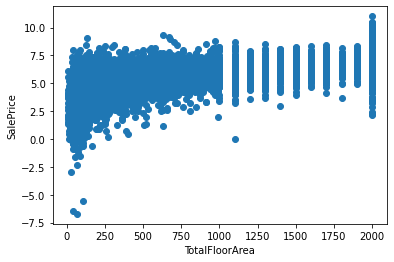

In [0]:
plt.figure
plt.scatter(train["TotalFloorArea"],train["SalePrice"])
plt.xlabel("TotalFloorArea")
plt.ylabel("SalePrice")

In [0]:
train['TotalFloorArea'] = pd.to_numeric(train["TotalFloorArea"])

In [0]:
test['TotalFloorArea'] = pd.to_numeric(test["TotalFloorArea"])

Text(0, 0.5, 'SalePrice')

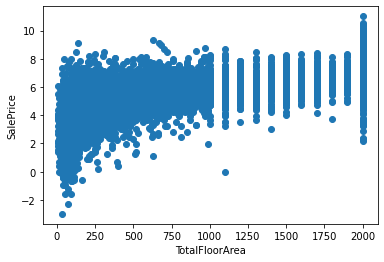

In [0]:
train = train.drop(train[(train['TotalFloorArea']<=500) & (train['SalePrice']<-5.0)].index)

#物件の広さと物件価格の散布図を作成
plt.figure
plt.scatter(train["TotalFloorArea"],train["SalePrice"])
plt.xlabel("TotalFloorArea")
plt.ylabel("SalePrice")

In [0]:
len(train["Area"])+len(test["Area"])

391185

In [0]:
all_data = pd.concat([train, test],ignore_index = True)

In [0]:
all_data.isnull().sum()

id                           0
Type                         0
Region                  176849
MunicipalityCode             0
Prefecture                   0
Municipality                 0
DistrictName               246
NearestStation            1688
TimeToNearestStation     10290
FloorPlan               220758
Area                         0
LandShape               177248
Frontage                195030
TotalFloorArea          259647
BuildingYear             89505
Structure                85466
Use                      93195
Purpose                 247718
Direction               177273
Classification          179639
Breadth                 180831
CityPlanning              3726
CoverageRatio             5771
FloorAreaRatio            5771
Period                       0
Renovation              231835
Remarks                 360548
SalePrice                34844
dtype: int64

In [0]:
all_data["BuildingYear"][0]

'昭和59年'

In [0]:
print(all_data["BuildingYear"].unique())

['昭和59年' '平成15年' '平成24年' '昭和61年' '平成11年' '昭和60年' '平成19年' '平成10年' nan
 '昭和57年' '昭和45年' '昭和47年' '昭和43年' '昭和64年' '平成25年' '平成16年' '平成9年' '平成5年'
 '昭和51年' '平成13年' '昭和52年' '昭和55年' '昭和54年' '平成2年' '平成21年' '平成22年' '平成18年'
 '平成14年' '平成6年' '平成17年' '昭和62年' '平成12年' '昭和38年' '昭和41年' '昭和48年' '平成20年'
 '昭和53年' '昭和49年' '平成26年' '昭和58年' '昭和56年' '昭和35年' '昭和50年' '昭和37年' '平成23年'
 '平成7年' '平成3年' '昭和63年' '戦前' '平成29年' '昭和36年' '平成28年' '昭和39年' '平成4年' '平成27年'
 '昭和42年' '昭和31年' '平成30年' '昭和44年' '昭和29年' '平成8年' '昭和27年' '昭和46年' '昭和30年'
 '昭和33年' '昭和32年' '昭和40年' '昭和26年' '昭和34年' '昭和25年' '昭和28年' '昭和22年' '昭和24年'
 '昭和23年' '昭和21年' '平成31年']


In [0]:
print(all_data["BuildingYear"].isnull().sum())

89505


In [0]:
all_data["BuildingYear"] = all_data["BuildingYear"].astype(str)

In [0]:
all_data["BuildingYear"] = all_data["BuildingYear"].replace("nan", np.nan)

In [0]:
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成2年", "1990")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成3年", "1991")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成4年", "1992")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成5年", "1993")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成6年", "1994")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成7年", "1995")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成8年", "1996")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成9年", "1997")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成10年", "1998")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成11年", "1999")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成12年", "2000")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成13年", "2001")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成14年", "2002")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成15年", "2003")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成16年", "2004")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成17年", "2005")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成18年", "2006")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成19年", "2007")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成20年", "2008")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成21年", "2009")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成22年", "2010")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成23年", "2011")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成24年", "2012")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成25年", "2013")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成26年", "2014")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成27年", "2015")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成28年", "2016")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成29年", "2017")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成30年", "2018")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("平成31年", "2019")

In [0]:
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和64年", "1989")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和63年", "1988")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和62年", "1987")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和61年", "1986")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和60年", "1985")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和59年", "1984")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和58年", "1983")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和57年", "1982")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和56年", "1981")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和55年", "1980")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和54年", "1979")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和53年", "1978")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和52年", "1977")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和51年", "1976")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和50年", "1975")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和49年", "1974")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和48年", "1973")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和47年", "1972")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和46年", "1971")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和45年", "1970")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和44年", "1979")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和43年", "1978")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和42年", "1977")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和41年", "1976")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和40年", "1975")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和39年", "1974")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和38年", "1973")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和37年", "1972")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和36年", "1971")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和35年", "1970")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和34年", "1969")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和33年", "1968")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和32年", "1967")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和31年", "1966")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和30年", "1965")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和29年", "1964")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和28年", "1963")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和27年", "1962")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和26年", "1961")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和25年", "1960")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和24年", "1959")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和23年", "1958")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和22年", "1957")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和21年", "1956")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和20年", "1955")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和19年", "1954")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和18年", "1953")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和17年", "1952")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和16年", "1951")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和15年", "1950")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和14年", "1949")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和13年", "1948")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和12年", "1947")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("昭和11年", "1946")
all_data["BuildingYear"] = all_data["BuildingYear"].str.replace("戦前", "1945")

In [0]:
print(all_data["BuildingYear"].isnull().sum())

89505


In [0]:
print(all_data["BuildingYear"].unique())

['1984' '2003' '2012' '1986' '1999' '1985' '2007' '1998' nan '1982' '1970'
 '1972' '1978' '1989' '2013' '2004' '1997' '1993' '1976' '2001' '1977'
 '1980' '1979' '1990' '2009' '2010' '2006' '2002' '1994' '2005' '1987'
 '2000' '1973' '2008' '1974' '2014' '1983' '1981' '1975' '2011' '1995'
 '1991' '1988' '1945' '2017' '1971' '2016' '1992' '2015' '1966' '2018'
 '1964' '1996' '1962' '1965' '1968' '1967' '1961' '1969' '1960' '1963'
 '1957' '1959' '1958' '1956' '2019']


In [0]:
def is_int(s):
    try:
        int(s)
        return True
    except ValueError:
        return False

In [0]:
#print(is_int(all_data["BuildingYear"][10000])

In [0]:
#try:
#  all_data["BuildingYear"] = all_data["BuildingYear"].astype(int)
#except ValueError:
#  pass

In [0]:
all_data["BuildingYear"].dtypes

dtype('O')

In [0]:
all_data["BuildingYear"].unique()

array(['1984', '2003', '2012', '1986', '1999', '1985', '2007', '1998',
       nan, '1982', '1970', '1972', '1978', '1989', '2013', '2004',
       '1997', '1993', '1976', '2001', '1977', '1980', '1979', '1990',
       '2009', '2010', '2006', '2002', '1994', '2005', '1987', '2000',
       '1973', '2008', '1974', '2014', '1983', '1981', '1975', '2011',
       '1995', '1991', '1988', '1945', '2017', '1971', '2016', '1992',
       '2015', '1966', '2018', '1964', '1996', '1962', '1965', '1968',
       '1967', '1961', '1969', '1960', '1963', '1957', '1959', '1958',
       '1956', '2019'], dtype=object)

In [0]:
all_data["BuildingYear"] =  pd.to_numeric(all_data["BuildingYear"],downcast='signed')

In [0]:
print(all_data["BuildingYear"])

0         1984.0
1         2003.0
2         2012.0
3         2003.0
4         1986.0
           ...  
391180       NaN
391181       NaN
391182       NaN
391183       NaN
391184       NaN
Name: BuildingYear, Length: 391185, dtype: float64


In [0]:
all_data["Period"].isnull().sum()

0

In [0]:
all_data["Period"] = all_data["Period"].str.replace("第１四半期", "")
all_data["Period"] = all_data["Period"].str.replace("第２四半期", "")
all_data["Period"] = all_data["Period"].str.replace("第３四半期", "")
all_data["Period"] = all_data["Period"].str.replace("第４四半期", "")
all_data["Period"] = all_data["Period"].str.replace("年", "")
print(all_data["Period"])

0         2017
1         2017
2         2017
3         2017
4         2017
          ... 
391180    2018
391181    2018
391182    2018
391183    2018
391184    2018
Name: Period, Length: 391185, dtype: object


In [0]:
try:
  all_data["Period"] = all_data["Period"].astype(int)
except ValueError:
  pass

In [0]:
all_data["Period"].unique()

array([2017, 2016, 2015, 2014, 2010, 2011, 2012, 2013, 2009, 2008, 2007,
       2006, 2005, 2018, 2019])

In [0]:
all_data["Period"][0]

2017

In [0]:
try:
  all_data["YearBuilt"] = all_data["Period"] - all_data["BuildingYear"]
except ValueError:
  pass

In [0]:
all_data["YearBuilt"].unique()

array([33., 14.,  5., 31., 18., 32., 10.,  9., nan, 34., 46., 43., 37.,
       16.,  8., 26., 30.,  2., 11.,  7., 13., 12., 23.,  4., 41., 45.,
       40., 47., 15., 17., 25.,  6.,  3., 35., 42., 38., 44., 20., 28.,
       39.,  1., 36., 22., 27., 24., 21., 71., 29.,  0., 19., 48., -1.,
       50., 52., 49., 51., 56., 57., -2., 54., 53., 72., 69., 60., 55.,
       70., 59., 58., 65., 67., 61., 64., 63., 62., 66., 68., 73., 74.])

In [0]:
print(all_data["Period"][0])
print(all_data["BuildingYear"][0])

2017
1984.0


In [0]:
all_data["YearBuilt"][0]

33.0

In [0]:
num = 0
for i in range(len(all_data["YearBuilt"])):
  if all_data["YearBuilt"][i] < 0:
    num +=1
print(num)

3934


In [0]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]

In [0]:
train.shape[0]

356341

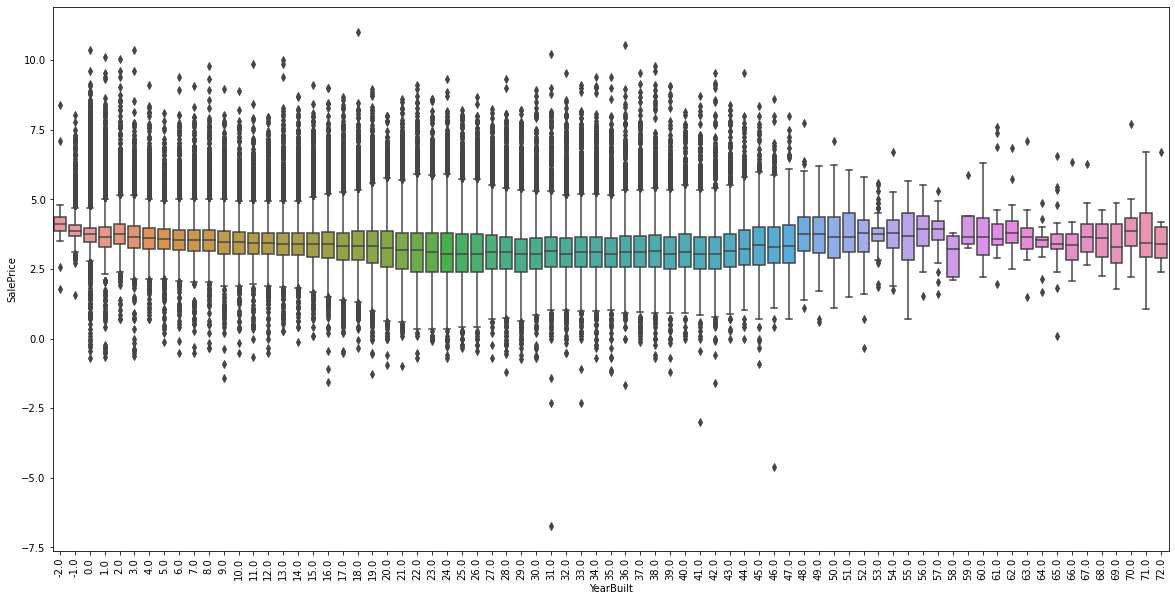

In [0]:
data = pd.concat([train["YearBuilt"],train["SalePrice"]],axis=1)

plt.figure(figsize=(20, 10))
plt.xticks(rotation='90')
sns.boxplot(x="YearBuilt",y="SalePrice",data=data)

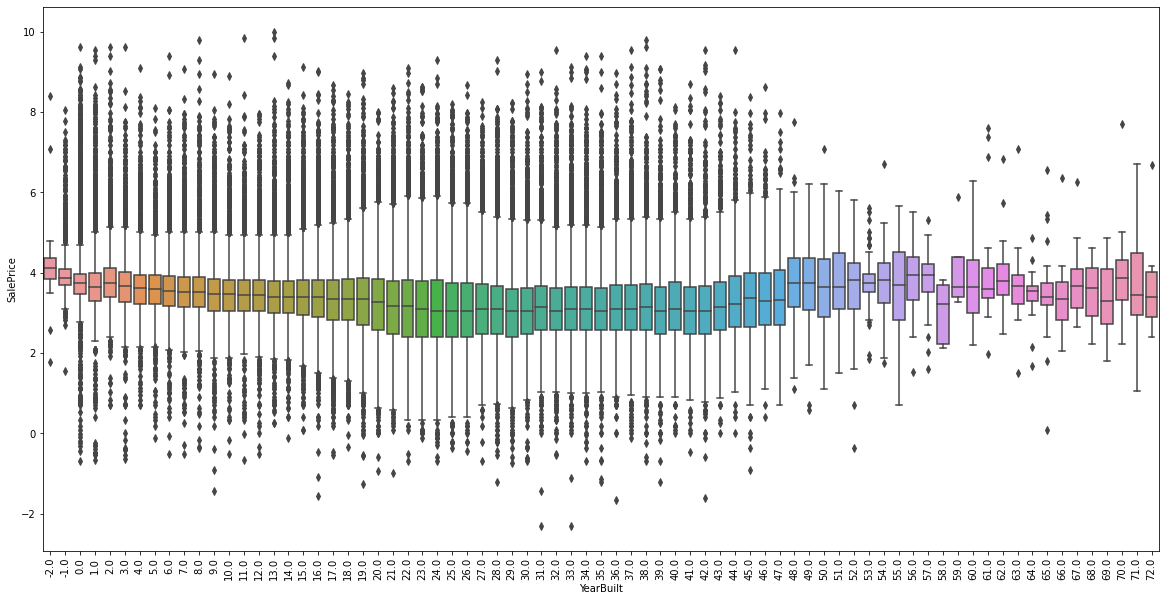

In [0]:
train = train.drop(train[(train['YearBuilt']<50) & (train['SalePrice']<-2.5)].index)
train = train.drop(train[(train['YearBuilt']<50) & (train['SalePrice']>10)].index)

data = pd.concat([train["YearBuilt"],train["SalePrice"]],axis=1)

plt.figure(figsize=(20, 10))
plt.xticks(rotation='90')
sns.boxplot(x="YearBuilt",y="SalePrice",data=data)

In [0]:
len(train["Area"])+len(test["Area"])

391175

In [0]:
print(train["Remarks"].isnull().sum())

328199


In [0]:
print(test["Remarks"].unique())

[nan '隣地の購入' '私道を含む取引' '調停・競売等' '関係者間取引' '隣地の購入、私道を含む取引' '調停・競売等、私道を含む取引'
 '関係者間取引、私道を含む取引' '他の権利・負担付き' '瑕疵有りの可能性' 'その他事情有り' '隣地の購入、調停・競売等']


In [0]:
print(train["Remarks"].unique())

[nan '私道を含む取引' '隣地の購入' '関係者間取引' '調停・競売等' '隣地の購入、私道を含む取引'
 '隣地の購入、関係者間取引、私道を含む取引' '関係者間取引、私道を含む取引' 'その他事情有り' '調停・競売等、私道を含む取引'
 '瑕疵有りの可能性' '古屋付き・取壊し前提' '隣地の購入、関係者間取引' '私道を含む取引、その他事情有り' '他の権利・負担付き'
 '隣地の購入、その他事情有り' '瑕疵有りの可能性、私道を含む取引' '隣地の購入、調停・競売等、私道を含む取引'
 '古屋付き・取壊し前提、私道を含む取引' '他の権利・負担付き、私道を含む取引' '関係者間取引、調停・競売等、私道を含む取引'
 '他の権利・負担付き、調停・競売等' '調停・競売等、その他事情有り' '古屋付き・取壊し前提、瑕疵有りの可能性'
 '隣地の購入、瑕疵有りの可能性' '隣地の購入、調停・競売等']


In [0]:
train["Remarks"] = train["Remarks"].str.replace('、',"")
train["Remarks"] = train["Remarks"].str.replace('私道を含む取引',"-1")
train["Remarks"] = train["Remarks"].str.replace('隣地の購入', "1")
train["Remarks"] = train["Remarks"].str.replace('関係者間取引', "-1")
train["Remarks"] = train["Remarks"].str.replace('調停・競売等', "-1")
#train["Remarks"] = train["Remarks"].str.replace('隣地の購入、私道を含む取引', "0")
#train["Remarks"] = train["Remarks"].str.replace('隣地の購入、関係者間取引、私道を含む取引', "-1")
#train["Remarks"] = train["Remarks"].str.replace('関係者間取引、私道を含む取引', "-2")
train["Remarks"] = train["Remarks"].str.replace('その他事情有り', "-1")
#train["Remarks"] = train["Remarks"].str.replace('調停・競売等、私道を含む取引', "-2")
train["Remarks"] = train["Remarks"].str.replace('瑕疵有りの可能性', "-1")
train["Remarks"] = train["Remarks"].str.replace('古屋付き・取壊し前提', "-1")
#train["Remarks"] = train["Remarks"].str.replace('隣地の購入、関係者間取引', "0")
#train["Remarks"] = train["Remarks"].str.replace('私道を含む取引、その他事情有り', "-2")
train["Remarks"] = train["Remarks"].str.replace('他の権利・負担付き', "1")
#train["Remarks"] = train["Remarks"].str.replace('隣地の購入、その他事情有り', "0")
#train["Remarks"] = train["Remarks"].str.replace('瑕疵有りの可能性、私道を含む取引', "-2")
#train["Remarks"] = train["Remarks"].str.replace('隣地の購入、調停・競売等、私道を含む取引', "-1")
#train["Remarks"] = train["Remarks"].str.replace('古屋付き・取壊し前提、私道を含む取引', "-2")
#train["Remarks"] = train["Remarks"].str.replace('他の権利・負担付き、私道を含む取引', "0")
#train["Remarks"] = train["Remarks"].str.replace('関係者間取引、調停・競売等、私道を含む取引', "-2")
#train["Remarks"] = train["Remarks"].str.replace('他の権利・負担付き、調停・競売等', "0")
#train["Remarks"] = train["Remarks"].str.replace('調停・競売等、その他事情有り', "-2")
#train["Remarks"] = train["Remarks"].str.replace('古屋付き・取壊し前提、瑕疵有りの可能性', "-2")
#train["Remarks"] = train["Remarks"].str.replace('隣地の購入、瑕疵有りの可能性', "0")
#train["Remarks"] = train["Remarks"].str.replace('隣地の購入、調停・競売等', "0")

In [0]:
train["Remarks"] = train["Remarks"].str.replace('1-1',"0")

In [0]:
train["Remarks"] = train["Remarks"].str.replace('-0',"-2")
train["Remarks"] = train["Remarks"].str.replace('0-1',"-1")

In [0]:
train["Remarks"] = train["Remarks"].str.replace('-2-1',"-3")

In [0]:
test["Remarks"] = test["Remarks"].str.replace('、',"")
test["Remarks"] = test["Remarks"].str.replace('私道を含む取引',"-1")
test["Remarks"] = test["Remarks"].str.replace('隣地の購入', "1")
test["Remarks"] = test["Remarks"].str.replace('関係者間取引', "-1")
test["Remarks"] = test["Remarks"].str.replace('調停・競売等', "-1")
test["Remarks"] = test["Remarks"].str.replace('隣地の購入、私道を含む取引', "0")
test["Remarks"] = test["Remarks"].str.replace('隣地の購入、関係者間取引、私道を含む取引', "-1")
test["Remarks"] = test["Remarks"].str.replace('関係者間取引、私道を含む取引', "-2")
test["Remarks"] = test["Remarks"].str.replace('その他事情有り', "-1")
test["Remarks"] = test["Remarks"].str.replace('調停・競売等、私道を含む取引', "-2")
test["Remarks"] = test["Remarks"].str.replace('瑕疵有りの可能性', "-1")
test["Remarks"] = test["Remarks"].str.replace('古屋付き・取壊し前提', "-1")
test["Remarks"] = test["Remarks"].str.replace('隣地の購入、関係者間取引', "0")
test["Remarks"] = test["Remarks"].str.replace('私道を含む取引、その他事情有り', "-2")
test["Remarks"] = test["Remarks"].str.replace('他の権利・負担付き', "1")
test["Remarks"] = test["Remarks"].str.replace('隣地の購入、その他事情有り', "0")
test["Remarks"] = test["Remarks"].str.replace('瑕疵有りの可能性、私道を含む取引', "-2")
test["Remarks"] = test["Remarks"].str.replace('隣地の購入、調停・競売等、私道を含む取引', "-1")
test["Remarks"] = test["Remarks"].str.replace('古屋付き・取壊し前提、私道を含む取引', "-2")
test["Remarks"] = test["Remarks"].str.replace('他の権利・負担付き、私道を含む取引', "0")
test["Remarks"] = test["Remarks"].str.replace('関係者間取引、調停・競売等、私道を含む取引', "-2")
test["Remarks"] = test["Remarks"].str.replace('他の権利・負担付き、調停・競売等', "0")
test["Remarks"] = test["Remarks"].str.replace('調停・競売等、その他事情有り', "-2")
test["Remarks"] = test["Remarks"].str.replace('古屋付き・取壊し前提、瑕疵有りの可能性', "-2")
test["Remarks"] = test["Remarks"].str.replace('隣地の購入、瑕疵有りの可能性', "0")
test["Remarks"] = test["Remarks"].str.replace('隣地の購入、調停・競売等', "0")

In [0]:
test["Remarks"] = test["Remarks"].str.replace('1-1',"0")

In [0]:
test["Remarks"] = test["Remarks"].str.replace('-0',"-2")

In [0]:
train["Remarks"] = train["Remarks"].astype(str)
test["Remarks"] = test["Remarks"].astype(str)

In [0]:
train["Remarks"] = train["Remarks"].str.replace('nan',"0")
test["Remarks"] = test["Remarks"].str.replace('nan',"0")

In [0]:
train["Remarks"].fillna(0).inplace=True
test["Remarks"].fillna(0).inplace=True

In [0]:
train["Remarks"] = train["Remarks"].astype(int)
test["Remarks"] = test["Remarks"].astype(int)

Text(0, 0.5, 'SalePrice')

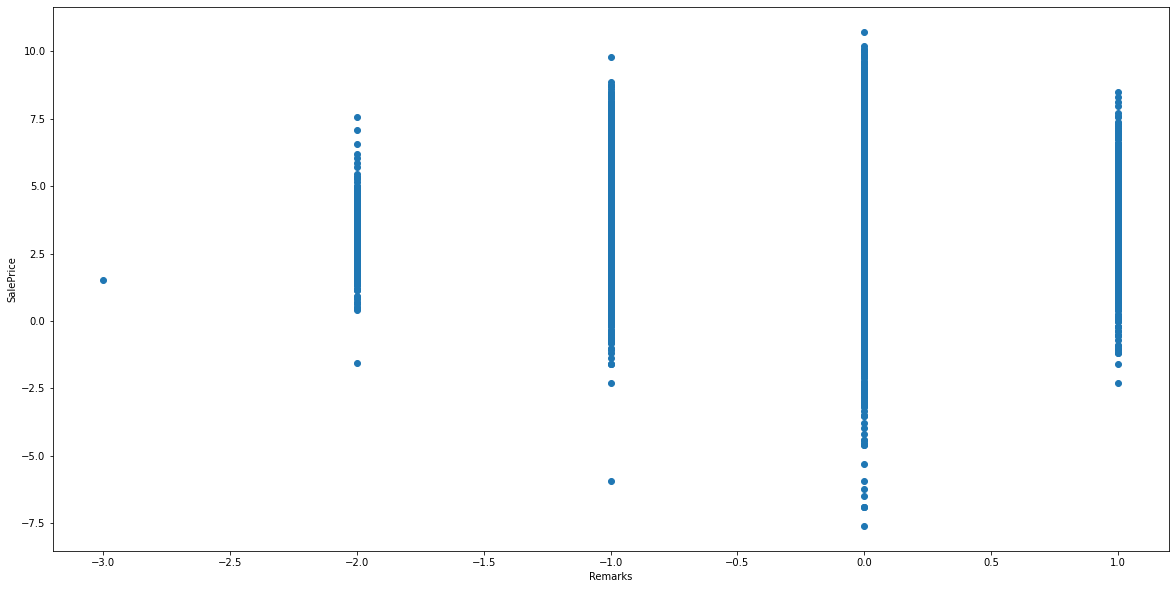

In [0]:
plt.figure(figsize=(20, 10))
plt.scatter(train["Remarks"],train["SalePrice"])
plt.xlabel("Remarks")
plt.ylabel("SalePrice")

In [0]:
train["Frontage"].unique()

array([nan, '6.8', '13.0', '6.4', '9.4', '15.0', '6.5', '6.7', '22.6',
       '3.5', '13.1', '10.4', '10.0', '14.7', '3.0', '13.5', '2.5', '5.0',
       '9.5', '6.0', '4.6', '6.3', '9.0', '7.0', '4.5', '7.1', '10.5',
       '16.0', '5.5', '8.5', '11.5', '15.6', '10.8', '7.5', '12.0', '4.3',
       '8.0', '14.8', '8.2', '9.9', '11.7', '5.2', '11.0', '18.0', '7.7',
       '3.8', '7.9', '3.7', '18.5', '20.0', '9.3', '6.1', '6.2', '5.6',
       '8.7', '12.5', '22.2', '16.5', '30.0', '4.7', '9.1', '4.0', '25.0',
       '7.2', '17.0', '14.0', '17.5', '5.8', '7.8', '14.5', '45.0',
       '26.0', '9.2', '24.0', '21.5', '31.6', '41.5', '2.4', '9.8', '7.3',
       '11.1', '9.7', '22.5', '19.0', '1.9', '12.6', '12.3', '23.0',
       '32.0', '22.0', '20.8', '15.5', '11.4', '4.8', '27.0', '23.5',
       '5.1', '4.4', '4.2', '6.6', '8.6', '11.3', '2.7', '9.6', '21.0',
       '11.8', '18.1', '6.9', '14.2', '29.0', '5.9', '5.4', '24.5',
       '15.4', '23.6', '8.4', '8.8', '38.5', '14.1', '3.9', '36.0

In [0]:
train["Frontage"] = train["Frontage"].str.replace("50.0m以上", "50")
test["Frontage"] = test["Frontage"].str.replace("50.0m以上", "50")

In [0]:
train["Frontage"] = train["Frontage"].astype(float)
test["Frontage"] = test["Frontage"].astype(float)

Text(0, 0.5, 'SalePrice')

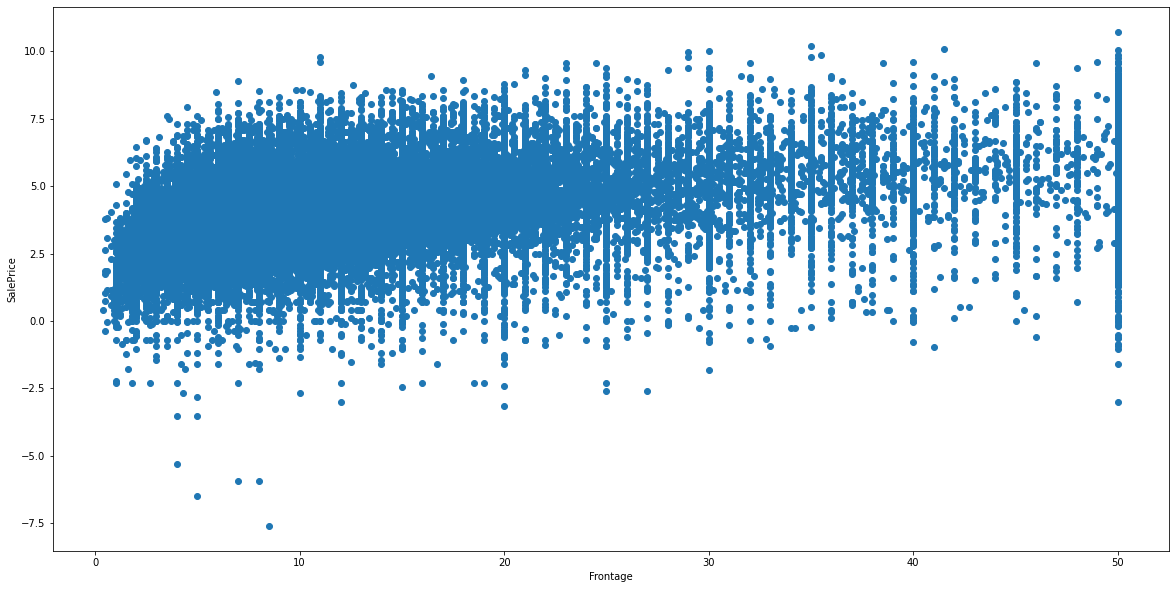

In [0]:
plt.figure(figsize=(20, 10))
plt.scatter(train["Frontage"],train["SalePrice"])
plt.xlabel("Frontage")
plt.ylabel("SalePrice")

Text(0, 0.5, 'SalePrice')

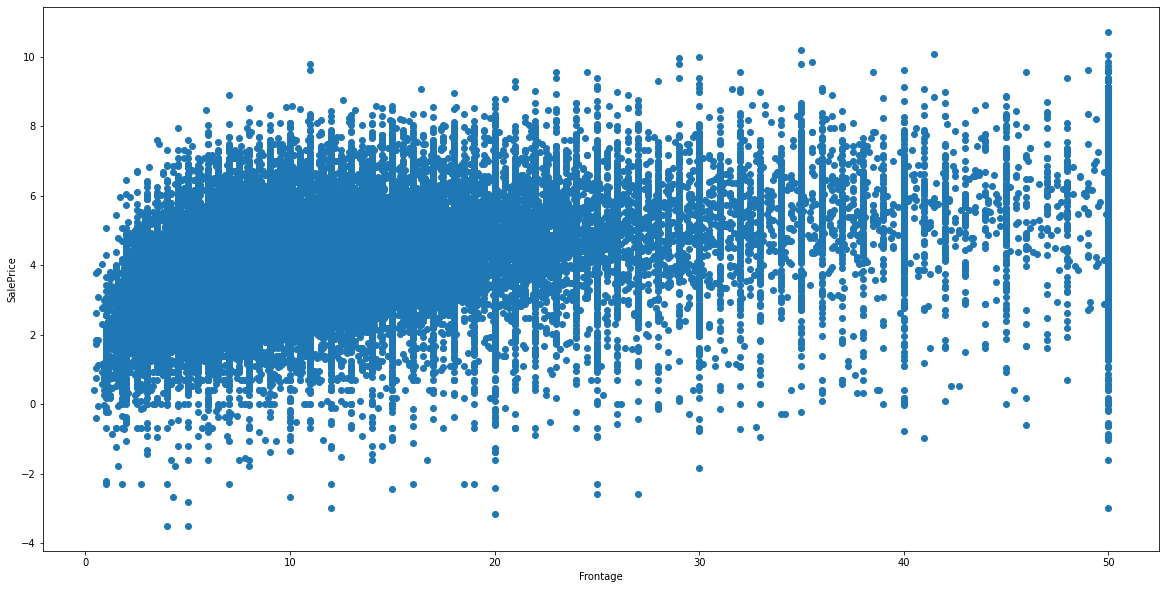

In [0]:
train = train.drop(train[(train["Frontage"]<50) & (train['SalePrice']<-3.75)].index)

#グラフを描画する
plt.figure(figsize=(20, 10))
plt.scatter(train["Frontage"],train["SalePrice"])
plt.xlabel("Frontage")
plt.ylabel("SalePrice")

In [0]:
train["Frontage"].isnull().sum()

176079

In [0]:
print(np.mean(train["Frontage"]))

9.643329986074537


In [0]:
len(train["Area"])+len(test["Area"])

391170

In [0]:
all_data = pd.concat([train, test], ignore_index=True)

In [0]:
all_words = pd.read_csv("all_words_df.csv")

In [0]:
all_words.sum(axis=0)

その他      1573.0
事務所      9529.0
住宅     288663.0
作業場      1276.0
倉庫       2937.0
共同      16104.0
工場       1050.0
店舗       9258.0
秘密      93190.0
駐車       1964.0
dtype: float64

In [0]:
all_words

,その他,事務所,住宅,作業場,倉庫,共同,工場,店舗,秘密,駐車
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
391165,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
391167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
391168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [0]:
all_words = all_words.fillna(0)

In [0]:
all_data = pd.concat([all_data, all_words], axis=1)

In [0]:
all_data.drop("Use", axis = 1, inplace = True)

In [0]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]

# Type 

In [0]:
test["Type"].unique()

array(['中古マンション等', '宅地(土地と建物)', '宅地(土地)', '林地', '農地'], dtype=object)

In [0]:
train["Type"].unique()

array(['中古マンション等', '宅地(土地と建物)', '宅地(土地)', '林地', '農地'], dtype=object)

In [0]:
train["Type"].isnull().sum()

0

In [0]:
le = LabelEncoder()
le.fit(train["Type"])
train["Type"] = le.transform(train["Type"])
test["Type"] = le.transform(test["Type"])

Text(0, 0.5, 'SalePrice')

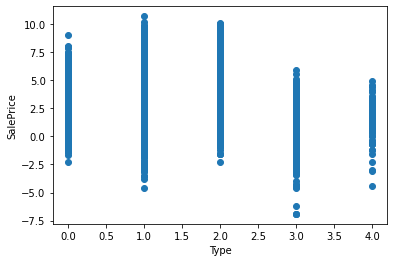

In [0]:
plt.figure()
plt.scatter(train["Type"],train["SalePrice"])
plt.xlabel("Type")
plt.ylabel("SalePrice")

In [0]:
train["MunicipalityCode"].isnull().sum()

0

Text(0, 0.5, 'SalePrice')

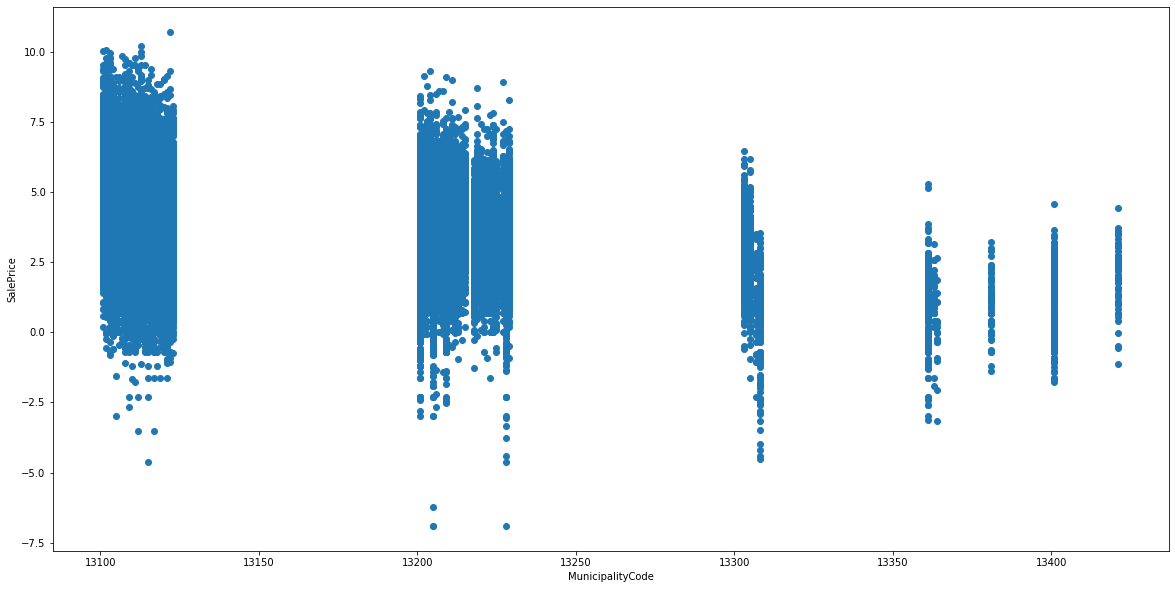

In [0]:
plt.figure(figsize=(20, 10))
plt.scatter(train["MunicipalityCode"],train["SalePrice"])
plt.xlabel("MunicipalityCode")
plt.ylabel("SalePrice")

In [0]:
train["MunicipalityCode"].unique()

array([13101, 13102, 13103, 13104, 13105, 13106, 13107, 13108, 13109,
       13110, 13111, 13112, 13113, 13114, 13115, 13116, 13117, 13118,
       13119, 13120, 13121, 13122, 13123, 13201, 13202, 13203, 13204,
       13205, 13206, 13207, 13208, 13209, 13210, 13211, 13212, 13213,
       13214, 13215, 13218, 13219, 13220, 13221, 13222, 13223, 13224,
       13225, 13227, 13228, 13229, 13303, 13305, 13307, 13308, 13361,
       13363, 13364, 13381, 13401, 13421])

In [0]:
test["MunicipalityCode"].unique()

array([13101, 13102, 13103, 13104, 13105, 13106, 13107, 13108, 13109,
       13110, 13111, 13112, 13113, 13114, 13115, 13116, 13117, 13118,
       13119, 13120, 13121, 13122, 13123, 13201, 13202, 13203, 13204,
       13205, 13206, 13207, 13208, 13209, 13210, 13211, 13212, 13213,
       13214, 13215, 13218, 13219, 13220, 13221, 13222, 13223, 13224,
       13225, 13227, 13228, 13229, 13303, 13305, 13307, 13308, 13361,
       13363, 13381, 13401, 13421])

In [0]:
train.dtypes

id                        int64
Type                      int64
Region                   object
MunicipalityCode          int64
Prefecture               object
Municipality             object
DistrictName             object
NearestStation           object
TimeToNearestStation     object
FloorPlan                object
Area                     object
LandShape                object
Frontage                float64
TotalFloorArea          float64
BuildingYear            float64
Structure                object
Purpose                  object
Direction                object
Classification           object
Breadth                 float64
CityPlanning             object
CoverageRatio           float64
FloorAreaRatio          float64
Period                    int64
Renovation               object
Remarks                   int64
SalePrice               float64
YearBuilt               float64
その他                     float64
事務所                     float64
住宅                      float64
作業場     

# Region

In [0]:
train["Region"].unique()

array([nan, '商業地', '住宅地', '工業地', '宅地見込地'], dtype=object)

In [0]:
train["Region"] = train["Region"].astype(str)

In [0]:
test["Region"] = test["Region"].astype(str)

In [0]:
train["Region"].value_counts()

住宅地      174754
nan      159404
商業地       20524
工業地        1202
宅地見込地       442
Name: Region, dtype: int64

In [0]:
train["Region"] = train["Region"].replace("nan", "1")
train["Region"] = train["Region"].replace("商業地", "2")
train["Region"] = train["Region"].replace("住宅地", "1")
train["Region"] = train["Region"].replace("工業地", "3")
train["Region"] = train["Region"].replace("宅地見込地", "4")

In [0]:
train["Region"] = train["Region"].astype(int)

In [0]:
test["Region"] = test["Region"].replace("nan", "1")
test["Region"] = test["Region"].replace("商業地", "2")
test["Region"] = test["Region"].replace("住宅地", "1")
test["Region"] = test["Region"].replace("工業地", "3")
test["Region"] = test["Region"].replace("宅地見込地", "4")

In [0]:
test["Region"] = test["Region"].astype(int)

In [0]:
train["Region"] = train["Region"].replace(0, np.nan)
test["Region"] = test["Region"].replace(0, np.nan)

Text(0, 0.5, 'SalePrice')

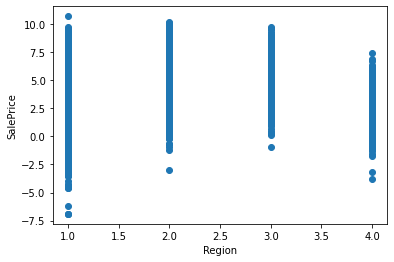

In [0]:
plt.figure
plt.scatter(train["Region"],train["SalePrice"])
plt.xlabel("Region")
plt.ylabel("SalePrice")

In [0]:
train = train.drop(["Prefecture"],axis=1)
test = test.drop(["Prefecture"],axis=1)

In [0]:
train["Municipality"].unique()

array(['千代田区', '中央区', '港区', '新宿区', '文京区', '台東区', '墨田区', '江東区', '品川区',
       '目黒区', '大田区', '世田谷区', '渋谷区', '中野区', '杉並区', '豊島区', '北区', '荒川区',
       '板橋区', '練馬区', '足立区', '葛飾区', '江戸川区', '八王子市', '立川市', '武蔵野市', '三鷹市',
       '青梅市', '府中市', '昭島市', '調布市', '町田市', '小金井市', '小平市', '日野市', '東村山市',
       '国分寺市', '国立市', '福生市', '狛江市', '東大和市', '清瀬市', '東久留米市', '武蔵村山市',
       '多摩市', '稲城市', '羽村市', 'あきる野市', '西東京市', '西多摩郡瑞穂町', '西多摩郡日の出町',
       '西多摩郡檜原村', '西多摩郡奥多摩町', '大島町', '新島村', '神津島村', '三宅村', '八丈町', '小笠原村'],
      dtype=object)

In [0]:
train["Municipality"].isnull().sum()

0

In [0]:
le = LabelEncoder()
le.fit(train["Municipality"])
train["Municipality"] = le.transform(train["Municipality"])
test["Municipality"] = le.transform(test["Municipality"])

In [0]:
train["DistrictName"].unique()

array(['飯田橋', '一番町', '岩本町', ..., '大字長岡下師岡', '切欠', '字金長'], dtype=object)

In [0]:
test["DistrictName"].unique()

array(['飯田橋', '一番町', '岩本町', ..., '三根', '父島', '母島'], dtype=object)

In [0]:
train["DistrictName"].isnull().sum()

246

In [0]:
train["DistrictName"].dropna()

0         飯田橋
1         飯田橋
2         飯田橋
3         飯田橋
4         飯田橋
         ... 
356321     父島
356322     父島
356323     母島
356324     母島
356325     母島
Name: DistrictName, Length: 356080, dtype: object

In [0]:
test["DistrictName"].isnull().sum()

0

In [0]:
le = LabelEncoder()
le.fit(train["DistrictName"].fillna("NA"))
train["DistrictName"] = le.transform(train["DistrictName"].fillna("NA"))
test["DistrictName"] = le.transform(test["DistrictName"].fillna("NA"))

In [0]:
train["NearestStation"].unique()

array(['飯田橋', '九段下', '水道橋', '麹町', '半蔵門', '秋葉原', '岩本町', '神田(東京)', '小伝馬町',
       '新日本橋', '馬喰町', '大手町(東京)', '小川町(東京)', '溜池山王', '淡路町', '新御茶ノ水', '浅草橋',
       '神保町', '御茶ノ水', '竹橋', '四ツ谷', '市ケ谷', '末広町(東京)', '湯島', '永田町', '馬喰横山',
       '日比谷', '新富町(東京)', '築地', '八丁堀(東京)', '勝どき', '京橋(東京)', '宝町(東京)', '東京',
       '銀座', '銀座一丁目', '汐留', '新橋', '築地市場', '東銀座', '茅場町', '月島', '日本橋(東京)',
       '水天宮前', '人形町', '三越前', '浜町', '東日本橋', '青山一丁目', '赤坂(東京)', '赤坂見附',
       '乃木坂', '六本木', '麻布十番', '神谷町', '六本木一丁目', '芝浦ふ頭', '竹芝', '田町(東京)',
       '浜松町', '日の出', '表参道', '外苑前', '北品川', '品川', '天王洲アイル', nan, '赤羽橋',
       '芝公園', '大門(東京)', '三田(東京)', '泉岳寺', '御成門', '白金台', '白金高輪', '広尾',
       '高輪台', '目黒', '内幸町', 'お台場海浜公園', '虎ノ門', '曙橋', '四谷三丁目', '江戸川橋', '神楽坂',
       '牛込柳町', '牛込神楽坂', '早稲田(メトロ)', '新大久保', '高田馬場', '西早稲田', '東新宿', '新宿',
       '新宿三丁目', '落合(東京)', '下落合', '中井', '東中野', '若松河田', '大久保(東京)', '中野坂上',
       '西新宿', '信濃町', '椎名町', '目白', '新宿御苑前', '国立競技場', '千駄ケ谷', '新井薬師前',
       '落合南長崎', '新江古田', '東長崎', '新宿西口', '都庁前', '西新宿五丁目', '初台',

In [0]:
len(test["NearestStation"])

34844

In [0]:
len(train["NearestStation"])

356326

# test の欠損値　確かめ
なかったら　train 削除

In [0]:
train["NearestStation"].isnull().sum()

1550

In [0]:
train["Renovation"].unique()

array(['改装済', '未改装', nan], dtype=object)

In [0]:
train = train.dropna(subset=["NearestStation"])

In [0]:
test["NearestStation"].isnull().sum()

137

In [0]:
test = test.fillna(method='ffill')

In [0]:
test["NearestStation"].value_counts()

八王子        318
新小岩        265
大森(東京)     231
大泉学園       225
国立         220
          ... 
新御茶ノ水        1
学習院下         1
上野御徒町        1
黒川(神奈川)      1
早稲田(都電)      1
Name: NearestStation, Length: 626, dtype: int64

In [0]:
train["NearestStation"].value_counts()

八王子       3315
大泉学園      3020
新小岩       2927
金町        2306
三鷹        2182
          ... 
東所沢          2
青海(東京)       1
遊園地西         1
桜ケ丘          1
武蔵小杉         1
Name: NearestStation, Length: 655, dtype: int64

In [0]:
all_data = pd.concat([train, test], ignore_index=True)

In [0]:
le = LabelEncoder()
le.fit(all_data["NearestStation"].fillna("NA"))
all_data["NearestStation"] = le.transform(all_data["NearestStation"].fillna("NA"))

In [0]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]

In [0]:
all_data["Area"].unique()

array(['55', '20', '45', '80', '70', '50', '85', '210', '105', '65', '25',
       '75', '100', '220', '30', '35', '115', '60', '95', '40', '110',
       '1200', '230', '125', '15', '170', '90', '300', '165', '200',
       '155', '180', '150', '480', '190', '120', '130', '510', '310',
       '195', '10', '260', '650', '500', '330', '140', '135', '380',
       '410', '270', '360', '730', '420', '280', '590', '560', '175',
       '145', '350', '460', '780', '1700', '240', '185', '160', '870',
       '540', '1000', '2000㎡以上', '290', '340', '530', '580', '390', '610',
       '1400', '1300', '490', '430', '400', '320', '940', '370', '980',
       '670', '1100', '910', '450', '660', '630', '1800', '470', '440',
       '250', '520', '550', '820', '1600', '640', '690', '840', '700',
       '850', '1500', '570', '900', '620', '920', '790', '890', '750',
       '960', '720', '950', '970', '830', '760', '710', '680', '740',
       '930', '600', '860', '800', '990', '770', '810', '880', '1900',
   

In [0]:
all_data = pd.concat([train, test], ignore_index=True)

In [0]:
all_data["Area"] = all_data["Area"].replace("2000㎡以上", "2000", regex=False)
all_data["Area"] = all_data["Area"].replace("5000㎡以上", "5000", regex=False)

In [0]:
all_data["Area"] = all_data["Area"].astype(int)

In [0]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]

#City planning

In [0]:
all_data["CityPlanning"].isnull().sum()

2684

In [0]:
train["CityPlanning"].isnull().sum()

2684

In [0]:
train = train.dropna(subset=["CityPlanning"])

In [0]:
all_data = pd.concat([train, test], ignore_index=True)

In [0]:
train["CityPlanning"].value_counts()

第１種低層住居専用地域               89479
商業地域                      61841
第１種中高層住居専用地域              50859
準工業地域                     48767
第１種住居地域                   38652
近隣商業地域                    33418
第２種中高層住居専用地域               8754
第２種住居地域                    7217
工業地域                       4790
準住居地域                      4776
第２種低層住居専用地域                2548
市街化調整区域                     602
工業専用地域                      266
都市計画区域外                     120
準都市計画区域                       2
市街化区域及び市街化調整区域外の都市計画区域        1
Name: CityPlanning, dtype: int64

In [0]:
test["CityPlanning"].value_counts()

第１種低層住居専用地域               8254
商業地域                      6678
準工業地域                     5077
第１種中高層住居専用地域              4646
第１種住居地域                   3802
近隣商業地域                    3517
第２種中高層住居専用地域               829
第２種住居地域                    659
工業地域                       535
準住居地域                      425
第２種低層住居専用地域                241
市街化区域及び市街化調整区域外の都市計画区域      84
市街化調整区域                     49
工業専用地域                      23
都市計画区域外                     22
準都市計画区域                      3
Name: CityPlanning, dtype: int64

In [0]:
train["CityPlanning"].unique()

array(['商業地域', '第１種住居地域', '第２種住居地域', '準工業地域', '準住居地域', '第１種中高層住居専用地域',
       '第２種中高層住居専用地域', '近隣商業地域', '第１種低層住居専用地域', '第２種低層住居専用地域', '工業地域',
       '工業専用地域', '市街化調整区域', '準都市計画区域', '都市計画区域外',
       '市街化区域及び市街化調整区域外の都市計画区域'], dtype=object)

In [0]:
all_data["CityPlanning"].unique()

array(['商業地域', '第１種住居地域', '第２種住居地域', '準工業地域', '準住居地域', '第１種中高層住居専用地域',
       '第２種中高層住居専用地域', '近隣商業地域', '第１種低層住居専用地域', '第２種低層住居専用地域', '工業地域',
       '工業専用地域', '市街化調整区域', '準都市計画区域', '都市計画区域外',
       '市街化区域及び市街化調整区域外の都市計画区域'], dtype=object)

In [0]:
le = LabelEncoder()
le.fit(all_data["CityPlanning"].fillna("NA"))
all_data["CityPlanning"] = le.transform(all_data["CityPlanning"].fillna("NA"))

In [0]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]

In [0]:
all_data = pd.concat([train, test], ignore_index=True)

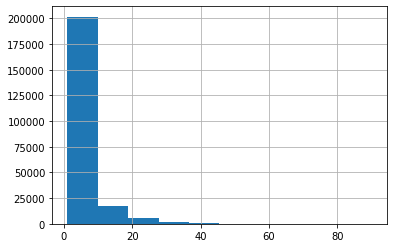

In [0]:
all_data["Breadth"].hist()

In [0]:
all_data["Classification"] = all_data["Classification"].replace("区道", 1)
all_data["Classification"] = all_data["Classification"].replace("都道", 2)
all_data["Classification"] = all_data["Classification"].replace("国道", 3)
all_data["Classification"] = all_data["Classification"].replace("道路", 4)
all_data["Classification"] = all_data["Classification"].replace("区画街路", 5)
all_data["Classification"] = all_data["Classification"].replace("市道", 6)
all_data["Classification"] = all_data["Classification"].replace("私道", 7)
all_data["Classification"] = all_data["Classification"].replace("町道", 8)
all_data["Classification"] = all_data["Classification"].replace("村道", 9)
all_data["Classification"] = all_data["Classification"].replace("道道", 10)
all_data["Classification"] = all_data["Classification"].replace("県道", 11)
all_data["Classification"] = all_data["Classification"].replace("農道", 12)
all_data["Classification"] = all_data["Classification"].replace("林道", 13)
all_data["Classification"] = all_data["Classification"].replace("府道", 14)

Text(0, 0.5, 'SalePrice')

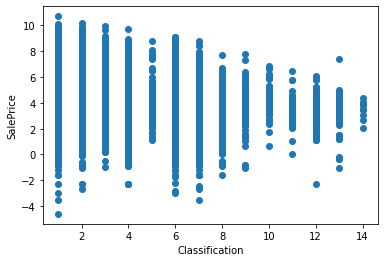

In [0]:
plt.figure()
plt.scatter(all_data["Classification"],all_data["SalePrice"])
plt.xlabel("Classification")
plt.ylabel("SalePrice")

In [0]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]

Text(0, 0.5, 'SalePrice')

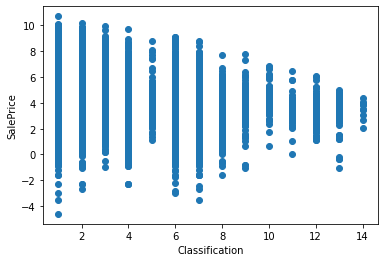

In [0]:
train = train.drop(train[(train["Classification"]>12) & (train['SalePrice']>7)].index)
train = train.drop(train[(train["Classification"]==12) & (train['SalePrice']<-2)].index)

all_data = pd.concat([train, test], ignore_index=True)

plt.figure()
plt.scatter(all_data["Classification"],all_data["SalePrice"])
plt.xlabel("Classification")
plt.ylabel("SalePrice")

In [0]:
all_data["Classification"] = all_data["Classification"].fillna(method="ffill")

In [0]:
all_data["Classification"] = all_data["Classification"].fillna(1)

In [0]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]

# Classification

In [0]:
all_data["Classification"].value_counts()

1.0     183384
7.0      93773
6.0      73517
2.0      18620
4.0       9676
3.0       4277
8.0       1532
5.0       1162
9.0        384
12.0       183
11.0       165
13.0       128
10.0       121
14.0        12
Name: Classification, dtype: int64

In [0]:
all_data["Classification"].isnull().sum()

0

In [0]:
train["Classification"].isnull().sum()

0

In [0]:
test["Classification"].isnull().sum()

0

In [0]:
test["Classification"].value_counts()

1.0     17162
7.0      8057
6.0      6283
2.0      1660
4.0      1033
3.0       417
8.0       115
5.0        84
9.0        18
10.0        8
13.0        5
12.0        1
14.0        1
Name: Classification, dtype: int64

In [0]:
all_data = pd.concat([train, test], ignore_index=True)

In [0]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]

In [0]:
train["Renovation"].isnull().sum()

210096

In [0]:
train["Renovation"].value_counts()

未改装    104940
改装済     37054
Name: Renovation, dtype: int64

# Direction

In [0]:
all_data = pd.concat([train, test], ignore_index=True)

In [0]:
all_data["Direction"].isnull().sum()

156559

In [0]:
test["Direction"].isnull().sum()

2

In [0]:
all_data["Direction"] = all_data["Direction"].fillna("不明")

In [0]:
test["Direction"].value_counts()

南        5304
西        5103
北        4995
東        4962
南東       3870
北西       3450
北東       3390
南西       3345
接面道路無     423
Name: Direction, dtype: int64

In [0]:
all_data = pd.concat([train, test], ignore_index=True)

In [0]:
all_data["Direction"].astype(str)

0         nan
1         nan
2         nan
3         nan
4          南西
         ... 
386929     北西
386930      北
386931     北東
386932      南
386933     北東
Name: Direction, Length: 386934, dtype: object

In [0]:
all_data["Direction"].unique()

array([nan, '南西', '北東', '東', '西', '北', '南東', '北西', '南', '接面道路無'],
      dtype=object)

In [0]:
all_data["Direction"] = all_data["Direction"].replace('接面道路無', 0)
all_data["Direction"] = all_data["Direction"].fillna(1)
all_data["Direction"] = all_data["Direction"].replace('北', 2)
all_data["Direction"] = all_data["Direction"].replace('北東', 3)
all_data["Direction"] = all_data["Direction"].replace('東', 4)
all_data["Direction"] = all_data["Direction"].replace( '南東', 5)
all_data["Direction"] = all_data["Direction"].replace('西', 6)
all_data["Direction"] = all_data["Direction"].replace('南西', 7)
all_data["Direction"] = all_data["Direction"].replace('南', 8)
all_data["Direction"] = all_data["Direction"].replace('北西', 9)

Text(0, 0.5, 'SalePrice')

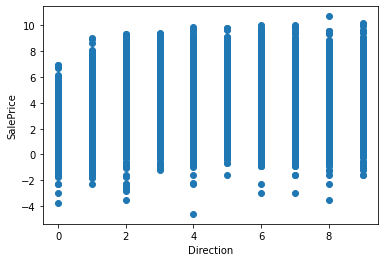

In [0]:
plt.figure()
plt.scatter(all_data["Direction"],all_data["SalePrice"])
plt.xlabel("Direction")
plt.ylabel("SalePrice")

In [0]:
print(len(all_data["FloorPlan"].unique()))

49


In [0]:
all_data["FloorPlan"].unique()

array(['２ＬＤＫ', '１Ｋ', '１ＬＤＫ', '１Ｒ', nan, '３ＬＤＫ', '１ＤＫ＋Ｓ', '３ＤＫ', '１ＤＫ',
       '２ＤＫ', 'オープンフロア', '４ＬＤＫ', '１Ｋ＋Ｓ', '１ＬＤＫ＋Ｓ', '２ＬＤＫ＋Ｓ', 'スタジオ', '２Ｋ',
       '２ＤＫ＋Ｓ', '３ＬＤＫ＋Ｓ', '３Ｋ', '４ＤＫ', '５ＬＤＫ＋Ｓ', '７ＬＤＫ', '２Ｋ＋Ｓ', 'メゾネット',
       '５ＬＤＫ', '３ＤＫ＋Ｓ', '４Ｋ', '４ＬＤＫ＋Ｓ', '２ＬＤ', '３ＬＫ', '１Ｒ＋Ｓ', '１ＬＫ',
       '２ＬＤ＋Ｓ', '５ＤＫ', '１Ｌ', '２ＬＫ＋Ｓ', '６ＬＤＫ', '２ＬＫ', '１Ｌ＋Ｓ', '６ＬＤＫ＋Ｓ',
       '６ＤＫ', '４ＤＫ＋Ｓ', '３Ｋ＋Ｓ', '３ＬＤ＋Ｓ', '１ＬＤ＋Ｓ', '３ＬＤ', '２Ｄ', '３ＬＤＫ＋Ｋ'],
      dtype=object)

In [0]:
print(all_data.query('FloorPlan == "スタジオ"'))

            id  Type  Region  MunicipalityCode  ...   工場   店舗   秘密   駐車
2033      2047     0       1             13102  ...  0.0  0.0  0.0  0.0
2865      2881     0       1             13102  ...  0.0  0.0  0.0  0.0
4804      4829     0       1             13103  ...  0.0  0.0  0.0  0.0
8426      8510     0       1             13103  ...  0.0  0.0  0.0  0.0
9613      9698     0       1             13104  ...  0.0  0.0  0.0  0.0
...        ...   ...     ...               ...  ...  ...  ...  ...  ...
266948  269521     0       1             13117  ...  0.0  0.0  0.0  0.0
310581  313729     0       1             13121  ...  0.0  0.0  0.0  0.0
310584  313732     0       1             13121  ...  0.0  0.0  0.0  0.0
326182  329612     0       1             13123  ...  0.0  0.0  0.0  0.0
366650   14561     0       1             13114  ...  0.0  0.0  0.0  0.0

[69 rows x 37 columns]


In [0]:
all_data["FloorPlan"] = all_data["FloorPlan"].astype(str)

In [0]:
all_data["FloorPlan"].isnull().sum()

200782

In [0]:
all_data["FloorPlan"] = all_data["FloorPlan"].replace('nan', np.nan)

In [0]:
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("オープンフロア", "")
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("メゾネット", "")
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("スタジオ", "")

In [0]:
all_data["FloorPlan"] = all_data["FloorPlan"].replace("", np.nan)

In [0]:
all_data["FloorPlan"].isnull().sum()

202489

In [0]:
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("ＬＤ", "+1.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("Ｋ", "+0.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("＋Ｓ", "+0.5", regex = False)

In [0]:
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("Ｌ", "+1.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("Ｄ", "+1.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("Ｒ", "", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("＋", "", regex = False)

In [0]:
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("１", "1", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("２", "2", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("３", "3", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("４", "4", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("５", "5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("６", "6", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("７", "7", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("８", "8", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("９", "9", regex = False)

In [0]:
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("1+1.5+0.5+0.5", "3.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("2+1.5+0.5+0.5", "4.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("3+1.5+0.5+0.5", "5.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("5+1.5+0.5+0.5", "7.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("4+1.5+0.5+0.5", "6.5", regex = False)

In [0]:
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("2+1.5+0.5", "4", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("1+1.5+0.5", "3", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("3+1.5+0.5", "5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("4+1.5+0.5", "6", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("1+0.5+0.5", "2", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("7+1.5+0.5", "9", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("2+0.5+0.5", "3", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("5+1.5+0.5", "7", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("6+1.5+0.5", "8", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("3+0.5+0.5", "4", regex = False)

In [0]:
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("1+0.5", "1.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("2+0.5", "2.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("3+0.5", "3.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("4+0.5", "4.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("2+1.5", "3.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("1+1.5", "2.5", regex = False)

In [0]:
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("3+1.5", "4.5", regex = False)
all_data["FloorPlan"] = all_data["FloorPlan"].str.replace("8+0.5", "8.5", regex = False)

In [0]:
all_data["FloorPlan"] = all_data["FloorPlan"].astype(float)

In [0]:
all_data["FloorPlan"].unique()

array([4. , 1.5, 3. , 1. , nan, 5. , 3.5, 6. , 2. , 4.5, 2.5, 5.5, 7.5,
       9. , 7. , 6.5, 8. , 8.5])

In [0]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]

In [0]:
all_data["FloorPlan"].isnull().sum()

202489

In [0]:
train["FloorPlan"].isnull().sum()

202308

Text(0, 0.5, 'Area')

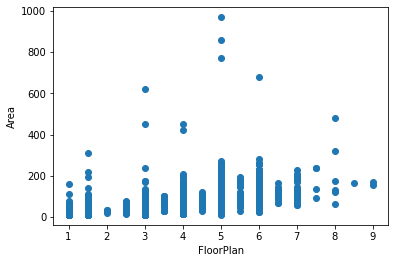

In [0]:
plt.figure()
plt.scatter(train["FloorPlan"],train["Area"])
plt.xlabel("FloorPlan")
plt.ylabel("Area")

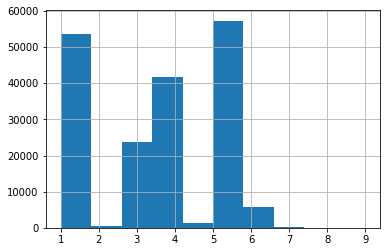

In [0]:
all_data["FloorPlan"].hist()

In [0]:
all_data["FloorPlan"].mean()

3.5093198514462305

In [0]:
train["Renovation"].unique()

array(['改装済', '未改装', nan], dtype=object)

# LandShape

In [0]:
all_data["LandShape"].unique()

array([nan, 'ほぼ台形', 'ほぼ長方形', 'ほぼ正方形', '不整形', '長方形', '台形', 'ほぼ整形', '正方形',
       '袋地等'], dtype=object)

In [0]:
all_data["LandShape"].isnull().sum()

156541

In [0]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]

In [0]:
train["LandShape"].isnull().sum()

156539

In [0]:
all_data["LandShape"].value_counts()

ほぼ長方形    80736
長方形      56852
不整形      35453
ほぼ台形     17429
ほぼ正方形    12118
ほぼ整形      9303
台形        8602
袋地等       8318
正方形       1582
Name: LandShape, dtype: int64

In [0]:
test["LandShape"] = test["LandShape"].fillna("ほぼ長方形")

In [0]:
all_data = pd.concat([train, test], ignore_index=True)

In [0]:
le = LabelEncoder()
le.fit(all_data["LandShape"].fillna("NA"))
all_data["LandShape"] = le.transform(all_data["LandShape"].fillna("NA"))

In [0]:
all_data["LandShape"].unique()

array([0, 1, 4, 3, 5, 9, 6, 2, 7, 8])

In [0]:
train = all_data.iloc[:train.shape[0],:]
test = all_data.iloc[train.shape[0]:,:]

Text(0, 0.5, 'SalePrice')

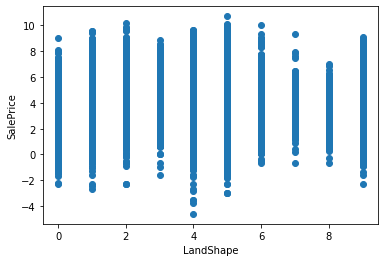

In [0]:
plt.figure()
plt.scatter(train["LandShape"],train["SalePrice"])
plt.xlabel("LandShape")
plt.ylabel("SalePrice")

In [0]:
train["LandShape"].isnull().sum()

0

# Renovation

In [0]:
train["Renovation"].unique()

array(['改装済', '未改装', nan], dtype=object)

In [0]:
all_data["Renovation"].unique()

array(['改装済', '未改装', nan], dtype=object)

In [0]:
all_data["Renovation"] = all_data["Renovation"].fillna('未改装')

In [0]:
all_data.isnull().sum()

id                           0
Type                         0
Region                       0
MunicipalityCode             0
Municipality                 0
DistrictName                 0
NearestStation               0
TimeToNearestStation      7532
FloorPlan               202489
Area                         0
LandShape                    0
Frontage                172555
TotalFloorArea          232323
BuildingYear             81091
Structure                77094
Purpose                 241371
Direction                    0
Classification               0
Breadth                 159631
CityPlanning                 0
CoverageRatio             1970
FloorAreaRatio            1970
Period                       0
Renovation                   0
Remarks                      0
SalePrice                34844
YearBuilt                81091
その他                          0
事務所                          0
住宅                           0
作業場                          0
倉庫                           0
共同      

In [0]:
le = LabelEncoder()
le.fit(all_data["Renovation"])
all_data["Renovation"] = le.transform(all_data["Renovation"])

In [0]:
all_data["Renovation"].unique()

array([0, 1])

# Stractre

In [0]:
all_data["Structure"].unique()

array(['ＳＲＣ', 'ＲＣ', nan, '鉄骨造', '木造', '鉄骨造、軽量鉄骨造', 'ＳＲＣ、ＲＣ', '軽量鉄骨造',
       '鉄骨造、木造', 'ＲＣ、鉄骨造', 'ＲＣ、木造', '木造、ブロック造', 'ＳＲＣ、鉄骨造', '木造、軽量鉄骨造',
       'ブロック造', 'ＲＣ、木造、ブロック造', '鉄骨造、ブロック造', 'ＲＣ、鉄骨造、木造', 'ＳＲＣ、木造',
       'ＲＣ、ブロック造', 'ＲＣ、軽量鉄骨造', 'ブロック造、軽量鉄骨造', '鉄骨造、木造、軽量鉄骨造',
       'ＲＣ、鉄骨造、ブロック造', 'ＲＣ、鉄骨造、木造、ブロック造', '鉄骨造、木造、ブロック造', 'ＲＣ、鉄骨造、軽量鉄骨造'],
      dtype=object)

In [0]:
len(all_data["Structure"])

386934

In [0]:
all_data = pd.get_dummies(all_data, columns=["Structure"])

In [0]:
train = all_data.iloc[:train.shape[0],:].reset_index(drop=True)
test = all_data.iloc[train.shape[0]:,:].reset_index(drop=True)

In [0]:
all_data["TimeToNearestStation"].unique()

array(['1', '5', '3', '4', '2', nan, '8', '7', '6', '0', '11', '10', '9',
       '12', '30分?60分', '13', '14', '16', '15', '19', '20', '18', '21',
       '23', '25', '17', '29', '28', '26', '24', '22', '1H30?2H',
       '1H?1H30', '2H?', '27'], dtype=object)

In [0]:
all_data["TimeToNearestStation"].unique()

array(['1', '5', '3', '4', '2', nan, '8', '7', '6', '0', '11', '10', '9',
       '12', '30分?60分', '13', '14', '16', '15', '19', '20', '18', '21',
       '23', '25', '17', '29', '28', '26', '24', '22', '1H30?2H',
       '1H?1H30', '2H?', '27'], dtype=object)

In [0]:
all_data["TimeToNearestStation"] = all_data["TimeToNearestStation"].str.replace("30分?60分", "45", regex = False)
all_data["TimeToNearestStation"] = all_data["TimeToNearestStation"].str.replace("2H?", "120", regex = False)
all_data["TimeToNearestStation"] = all_data["TimeToNearestStation"].str.replace("1H30?2H", "105", regex = False)
all_data["TimeToNearestStation"] = all_data["TimeToNearestStation"].str.replace("1H?1H30", "75", regex = False)

In [0]:
all_data["TimeToNearestStation"] = pd.to_numeric(all_data["TimeToNearestStation"])

In [0]:
all_data.isnull().sum()

id                        0
Type                      0
Region                    0
MunicipalityCode          0
Municipality              0
                         ..
Structure_ＲＣ、鉄骨造、軽量鉄骨造    0
Structure_ＳＲＣ             0
Structure_ＳＲＣ、木造          0
Structure_ＳＲＣ、鉄骨造         0
Structure_ＳＲＣ、ＲＣ          0
Length: 62, dtype: int64

# Purpose

In [0]:
all_data["Purpose"].unique()

array(['住宅', 'その他', '事務所', nan, '店舗', '倉庫', '工場'], dtype=object)

In [0]:
all_data["Purpose"].isnull().sum()

241371

In [0]:
all_data["Purpose"] = all_data["Purpose"].fillna('住宅')

In [0]:
all_data["Purpose"].value_counts()

住宅     368484
その他     12822
事務所      2996
店舗       1831
倉庫        513
工場        288
Name: Purpose, dtype: int64

In [0]:
le = LabelEncoder()
le.fit(all_data["Purpose"].fillna("NA"))
all_data["Purpose"] = le.transform(all_data["Purpose"].fillna("NA"))

In [0]:
all_data["Purpose"].unique()

array([2, 0, 1, 5, 3, 4])

In [0]:
all_data["TotalFloorArea"].unique()

array([  nan,  330.,  460.,  250.,  500., 1200.,  830.,   55., 2000.,
        400.,  950.,  870.,  145., 1100.,  195.,  670.,  310.,  210.,
        120., 1600.,  610., 1000.,  240.,  580.,  800.,  600.,  280.,
        900.,  200.,  570.,  380.,  620.,  270.,   75., 1800.,  370.,
         70.,  125.,  230.,  560.,   60.,  260.,  185.,  430.,   85.,
        470.,  530.,  640.,   80.,  920.,  320.,  290.,  180.,  410.,
       1300.,  115.,  350.,  440.,  300.,  100.,  590.,  140.,  980.,
        155.,  540.,  390.,  420., 1900.,  840.,  105.,  550.,  490.,
        110.,  480.,  940.,  750.,  135.,  760., 1400.,  930.,  880.,
        970.,  630., 1700.,  170.,  690.,  340.,  820.,  990.,  220.,
        890.,  770.,   95.,  160.,   65.,  175.,  710.,  650.,  810.,
        150.,  520.,  130., 1500.,  360.,   90.,  450.,  510.,  740.,
         40.,   50.,   45.,  165.,  660.,  190.,  680.,  780.,  960.,
        860.,  910.,   35.,   30.,  700.,  720.,  790.,   10.,   25.,
        850.,  730.,

In [0]:
pd.set_option('display.max_rows', None)
all_data.dtypes

id                             int64
Type                           int64
Region                         int64
MunicipalityCode               int64
Municipality                   int64
DistrictName                   int64
NearestStation                 int64
TimeToNearestStation         float64
FloorPlan                    float64
Area                           int64
LandShape                      int64
Frontage                     float64
TotalFloorArea               float64
BuildingYear                 float64
Purpose                        int64
Direction                      int64
Classification               float64
Breadth                      float64
CityPlanning                   int64
CoverageRatio                float64
FloorAreaRatio               float64
Period                         int64
Renovation                     int64
Remarks                        int64
SalePrice                    float64
YearBuilt                    float64
その他                          float64
事

In [0]:
all_data.isnull().sum()

id                                0
Type                              0
Region                            0
MunicipalityCode                  0
Municipality                      0
DistrictName                      0
NearestStation                    0
TimeToNearestStation           7532
FloorPlan                    202489
Area                              0
LandShape                         0
Frontage                     172555
TotalFloorArea               232323
BuildingYear                  81091
Purpose                           0
Direction                         0
Classification                    0
Breadth                      159631
CityPlanning                      0
CoverageRatio                  1970
FloorAreaRatio                 1970
Period                            0
Renovation                        0
Remarks                           0
SalePrice                     34844
YearBuilt                     81091
その他                               0
事務所                         

In [0]:
train = all_data.iloc[:train.shape[0],:].reset_index(drop=True)
test = all_data.iloc[train.shape[0]:,:].reset_index(drop=True)

In [0]:
print(all_data["CoverageRatio"].mean())

62.06769983686786


In [0]:
all_data["CoverageRatio"] = all_data["CoverageRatio"].fillna(all_data["CoverageRatio"].mean())

In [0]:
all_data["Frontage"].value_counts()

10.0    9146
8.0     9121
7.0     8719
9.0     8621
6.0     8327
5.0     6971
11.0    5735
12.0    5708
2.5     5171
7.5     4487
5.5     4380
6.5     4117
13.0    3798
4.0     3691
4.5     3637
8.5     3622
15.0    3493
3.0     3320
9.5     2804
14.0    2779
2.0     2350
10.5    2194
7.2     1790
16.0    1749
18.0    1665
11.5    1648
12.5    1539
5.4     1505
2.7     1489
7.3     1451
20.0    1449
17.0    1393
3.5     1348
7.8     1338
8.2     1281
6.8     1279
6.6     1260
6.3     1246
5.8     1207
6.4     1197
6.7     1178
5.6     1176
50.0    1165
13.5    1144
7.6     1126
8.3     1103
7.7     1102
6.2     1084
4.8     1082
8.7     1070
9.2     1047
8.4     1045
7.4     1044
5.2     1021
8.6     1017
5.7     1017
5.3     1006
9.1      999
4.7      986
8.1      984
14.5     969
6.9      969
4.2      967
5.1      938
8.8      937
4.6      917
7.9      914
2.6      909
9.3      908
9.6      896
6.1      886
5.9      871
7.1      849
8.9      844
19.0     811
4.9      790
9.4      787

In [0]:
all_data["FloorAreaRatio"] = all_data["FloorAreaRatio"].fillna(all_data["FloorAreaRatio"].mean())

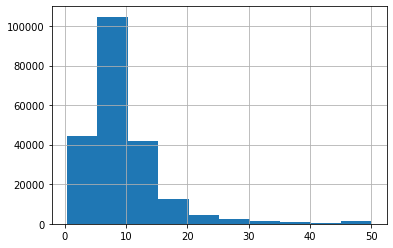

In [0]:
all_data["Frontage"].hist()

In [0]:
all_data["Classification"].value_counts()

1.0     183384
7.0      93773
6.0      73517
2.0      18620
4.0       9676
3.0       4277
8.0       1532
5.0       1162
9.0        384
12.0       183
11.0       165
13.0       128
10.0       121
14.0        12
Name: Classification, dtype: int64

In [0]:
all_data["Frontage"] = all_data["Frontage"].fillna(all_data["Frontage"].mode().iloc[0])

In [0]:
all_data["TimeToNearestStation"] = all_data["TimeToNearestStation"].fillna(all_data["TimeToNearestStation"].mode().iloc[0])

In [0]:
all_data["TotalFloorArea"] = all_data["TotalFloorArea"].fillna(all_data["TotalFloorArea"].mode().iloc[0])

In [0]:
all_data["YearBuilt"] = all_data["YearBuilt"].fillna(10)

In [0]:
all_data["YearBuilt"].mean()

13.42415760827428

In [0]:
a = all_data["Period"].mean()-10
a

2002.352398600278

In [0]:
all_data["BuildingYear"].mean()

1998.2247329512202

In [0]:
all_data["BuildingYear"] = all_data["BuildingYear"].fillna(all_data["BuildingYear"].mean())

In [0]:
all_data.isnull().sum()

id                                0
Type                              0
Region                            0
MunicipalityCode                  0
Municipality                      0
DistrictName                      0
NearestStation                    0
TimeToNearestStation              0
FloorPlan                    202489
Area                              0
LandShape                         0
Frontage                          0
TotalFloorArea                    0
BuildingYear                      0
Purpose                           0
Direction                         0
Classification                    0
Breadth                      159631
CityPlanning                      0
CoverageRatio                     0
FloorAreaRatio                    0
Period                            0
Renovation                        0
Remarks                           0
SalePrice                     34844
YearBuilt                         0
その他                               0
事務所                         

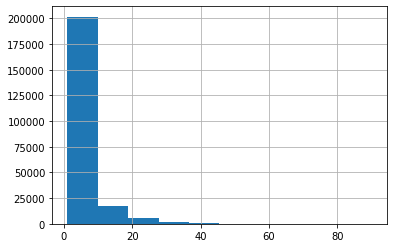

In [0]:
all_data["Breadth"].hist()

In [0]:
all_data["Breadth"].mean()

6.344071569666947

In [0]:
all_data["Breadth"] = all_data["Breadth"].fillna(all_data["Breadth"].mean())

In [0]:
train.shape[0]

352090

In [0]:
all_data.isnull().sum()

id                                0
Type                              0
Region                            0
MunicipalityCode                  0
Municipality                      0
DistrictName                      0
NearestStation                    0
TimeToNearestStation              0
FloorPlan                    202489
Area                              0
LandShape                         0
Frontage                          0
TotalFloorArea                    0
BuildingYear                      0
Purpose                           0
Direction                         0
Classification                    0
Breadth                           0
CityPlanning                      0
CoverageRatio                     0
FloorAreaRatio                    0
Period                            0
Renovation                        0
Remarks                           0
SalePrice                     34844
YearBuilt                         0
その他                               0
事務所                         

In [0]:
all_data.to_csv("all_data_1.csv", index = False)

In [0]:
all_data = pd.read_csv("all_data_1.csv")

In [0]:
all_data.isnull().sum()

id                                0
Type                              0
Region                            0
MunicipalityCode                  0
Municipality                      0
DistrictName                      0
NearestStation                    0
TimeToNearestStation              0
FloorPlan                    202489
Area                              0
LandShape                         0
Frontage                          0
TotalFloorArea                    0
BuildingYear                      0
Purpose                           0
Direction                         0
Classification                    0
Breadth                           0
CityPlanning                      0
CoverageRatio                     0
FloorAreaRatio                    0
Period                            0
Renovation                        0
Remarks                           0
SalePrice                     34844
YearBuilt                         0
その他                               0
事務所                         